In [4]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

# Set defaults for charts so they aren't so tiny!
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10,5]

import numpy
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from pprint import pprint
import pandas as pd
import csv
import sklearn.covariance
import sklearn.linear_model
import scipy.stats

In [6]:
with open('initialization_rounds_results.csv', 'rt') as file:
    reader = csv.DictReader(file)
    results = list([dict(item) for item in reader])
    
results = [{key:(float(item) if '.' in item else item) for key,item in result.items()} for result in results]
for result in results:
    result['stdvsmedian'] = result['std'] / result['median']
    result['stdvsmin'] = result['std'] / result['min']

    
nonFeatureKeys=['gamma', 'loss', 'min', 'median', 'max']
lossKeys = ['initialization_rounds_5', 
            'initialization_rounds_10',
            'initialization_rounds_20',
            'initialization_rounds_30',
            'initialization_rounds_40',
            'initialization_rounds_50', 
            'initialization_rounds_60',
            'initialization_rounds_70',
            'initialization_rounds_80',
            'initialization_rounds_90']

for result in results:
    best = min(lossKeys, key=lambda key: result[key])
    result['best'] = best
    result['bestSize'] = int(best[len('initialization_rounds_'):])
    
    
features = [{key:value for key,value in result.items() if key not in nonFeatureKeys} for result in results]
pd.DataFrame(features)

,best,best/median,bestSize,contributions_exponential,contributions_linear,contributions_logarithmic,contributions_peakvalley,contributions_random,independentModellingRate,initialization_rounds_10,...,lossFunction,nEICandidates,num_parameters,priorWeight,range,secondaryCutoff,skew,std,stdvsmedian,stdvsmin
0,initialization_rounds_10,0.827658,10,0.153846,0.307692,0.076923,0.230769,0.230769,,0.237377,...,,,13,,0.347069,,1.298210,0.040356,0.136167,0.164555
1,initialization_rounds_50,0.514336,50,0.666667,0.333333,0.000000,0.000000,0.000000,,0.079189,...,,,3,,0.312349,,2.166477,0.086696,0.646216,1.249587
2,initialization_rounds_5,0.951451,5,0.000000,0.666667,0.000000,0.000000,0.333333,,0.556535,...,,,3,,0.609447,,0.695072,0.028514,0.048838,0.051336
3,initialization_rounds_10,0.862394,10,0.000000,0.000000,0.000000,0.666667,0.333333,,0.093217,...,,,3,,0.482379,,3.011153,0.162605,1.466337,1.701654
4,initialization_rounds_20,0.872265,20,0.250000,0.187500,0.125000,0.375000,0.062500,,0.268403,...,,,16,,0.350043,,1.432155,0.034870,0.116479,0.133565
5,initialization_rounds_10,0.913723,10,0.666667,0.000000,0.000000,0.333333,0.000000,,0.477617,...,,,3,,0.622818,,1.401331,0.064292,0.122399,0.134042
6,initialization_rounds_10,0.806719,10,0.142857,0.285714,0.142857,0.428571,0.000000,,0.186191,...,,,7,,0.307711,,1.386690,0.049208,0.209175,0.259275
7,initialization_rounds_30,0.772118,30,0.000000,0.666667,0.000000,0.333333,0.000000,,0.115326,...,,,3,,0.363049,,2.250582,0.092396,0.608900,0.797863
8,initialization_rounds_20,0.506103,20,0.000000,0.000000,0.250000,0.500000,0.250000,,0.074430,...,,,4,,0.334630,,1.919416,0.110641,0.846732,1.665140
9,initialization_rounds_5,0.839718,5,0.000000,0.166667,0.250000,0.250000,0.333333,,0.245431,...,,,12,,0.337886,,1.197699,0.036362,0.123435,0.146905


<IPython.core.display.Javascript object>


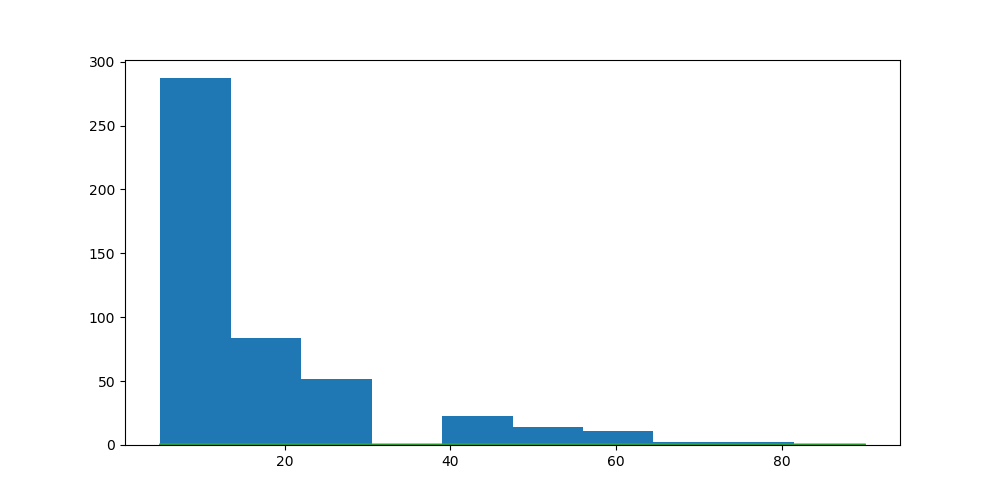

(array([287.,  84.,  52.,   0.,  23.,  14.,  11.,   2.,   2.,   1.]),
 array([ 5. , 13.5, 22. , 30.5, 39. , 47.5, 56. , 64.5, 73. , 81.5, 90. ]),
 <a list of 10 Patch objects>)

In [10]:
sizes = [result['bestSize'] for result in results]

averageSize = numpy.max(sizes)

plt.hist(sizes)




<IPython.core.display.Javascript object>


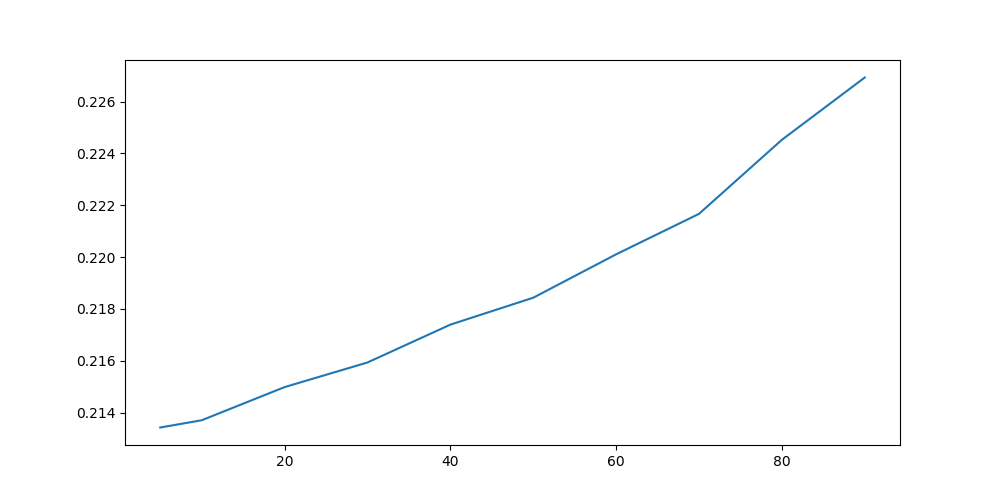

In [20]:
averageLoss = {}

for key in lossKeys:
    length = int(key[len('initialization_rounds_'):])
    averageLoss[length] = numpy.mean([result[key] for result in results])


averageLoss
ax, fig = plt.subplots()
fig.plot(averageLoss.keys(), averageLoss.values())
fig

In [26]:
labels = [key for key in results[0].keys() if key not in nonFeatureKeys and key not in lossKeys]

bestSizes = [result['bestSize'] for result in results]

correlations = []
for label in labels:
    vector = [result[label] for result in results]
    correlation = scipy.stats.spearmanr(vector, bestSizes)[0]
    correlations.append({'name': label, 'correlation': correlation})

    
with open('correls.csv', 'wt') as file:
    writer = csv.DictWriter(file, fieldnames=['name','correlation'])
    writer.writeheader()
    writer.writerows(correlations)


correlations = list(sorted(correlations, key=lambda r:-abs(r['correlation'])))
pd.DataFrame(correlations)

/home/bradley/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
/home/bradley/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/bradley/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/bradley/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/bradley/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/bradley/anaconda3/lib/python3.6/site-packages/scipy/stats/

,correlation,name
0,1.000000,bestSize
1,-0.174586,best
2,0.134112,interactions_wave
3,-0.116453,interactions_linear
4,-0.096599,skew
5,-0.088962,kurtosis
6,0.080427,interactions_index
7,-0.078990,num_parameters
8,-0.078901,std
9,0.077562,interactions
